# Visualizations of Earnings report

In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [343]:
# params
FP_EER_CLEAN = os.path.join('data','eer16_clean.feather')
assert os.path.exists(FP_EER_CLEAN)

FP_FIG_TOP_OUT = os.path.join('plots','top_50_bar.svg')
FP_FIG_OVRTM_OUT = os.path.join('plots','top_20_overtime.svg')

PREFERRED_COL_NAMES = ['name','dept','title','regular','overtime','detail','longevity','incentive','severance','other','total']

matplotlib.style.use('seaborn')

In [59]:
eer = pd.read_feather(FP_EER_CLEAN)
og_cols = eer.columns
eer.columns = PREFERRED_COL_NAMES

In [60]:
eer.head()

,name,dept,title,regular,overtime,detail,longevity,incentive,severance,other,total
0,"ANDREWS, GREGORY",ASSESSING,ASSISTANT ASSESSOR,12935.87,0.0,0.0,358.33,0.0,0.0,18957.1,32251.30
1,"ANDREWS, LOUISE",ASSESSING,SR CITIZEN TAX WORK,1000.00,0.0,0.0,0.00,0.0,0.0,0.0,1000.00
2,"ASHKOURI, NIDHAM",ASSESSING,SR CITIZEN TAX WORK,1000.00,0.0,0.0,0.00,0.0,0.0,0.0,1000.00
3,"BASTIANELLI, CATERINA",ASSESSING,SR CITIZEN TAX WORK,1000.00,0.0,0.0,0.00,0.0,0.0,0.0,1000.00
4,"CARUSO, MARIE",ASSESSING,ASSISTANT ASSESSOR,66604.83,0.0,0.0,875.00,0.0,0.0,3310.2,70790.03


In [61]:
# group other category for 3 main groups
eer.loc['other'] = eer.loc[:,'longevity':'other'].sum(axis=1)
eer.drop(['longevity','incentive','severance'],axis=1,inplace=True)

In [62]:
eer.loc[:,:'title'] = eer.loc[:,:'title'].astype('category')

In [63]:
eer.head()

,name,dept,title,regular,overtime,detail,other,total
0,"ANDREWS, GREGORY",ASSESSING,ASSISTANT ASSESSOR,12935.87,0.0,0.0,18957.1,32251.30
1,"ANDREWS, LOUISE",ASSESSING,SR CITIZEN TAX WORK,1000.00,0.0,0.0,0.0,1000.00
2,"ASHKOURI, NIDHAM",ASSESSING,SR CITIZEN TAX WORK,1000.00,0.0,0.0,0.0,1000.00
3,"BASTIANELLI, CATERINA",ASSESSING,SR CITIZEN TAX WORK,1000.00,0.0,0.0,0.0,1000.00
4,"CARUSO, MARIE",ASSESSING,ASSISTANT ASSESSOR,66604.83,0.0,0.0,3310.2,70790.03


## top 50 best paid employees

In [329]:
top_50 = pd.DataFrame(eer.sort_values(by='total',ascending=False).reset_index(drop=True).loc[:50,:])

In [330]:
top_50.head(20)

,name,dept,title,regular,overtime,detail,other,total
0,"FLEISHMAN, DAVID",SCHOOL DEPARTMENT,SUPERINTENDENT OF SCHOOLS,269814.96,0.00,0.00,26188.75,296003.71
1,"MCCARTHY, JAMES",POLICE DEPARTMENT,POLICE OFFICER,65511.20,25923.08,95404.00,15317.55,221908.69
2,"PROIA, BRUCE",FIRE DEPARTMENT,FIRE CHIEF,151458.58,0.00,0.00,19366.07,196120.31
3,"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,91733.57,19559.50,54753.50,7156.42,195029.86
4,"MACDONALD, DAVID",POLICE DEPARTMENT,POLICE CHIEF,140744.31,0.00,0.00,13518.76,193479.10
5,"CLAFLIN, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,78404.48,11378.07,70456.00,9551.15,191237.89
6,"BABCOCK, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,72597.34,22847.44,57957.50,6656.60,181755.27
7,"CASTRO, MICHAEL",FIRE DEPARTMENT,DEPUTY FIRE CHIEF,106861.28,29041.37,360.00,29125.36,180486.77
8,"JIMENEZ, ISRAEL",FIRE DEPARTMENT,DEPUTY FIRE CHIEF,107332.30,18666.78,5990.00,16471.49,178888.02
9,"PANICA, JOHN",POLICE DEPARTMENT,POLICE OFFICER,60276.16,18987.44,59157.25,19805.14,176169.95


In [331]:
top_50_count = top_50.groupby('dept').count().total

In [332]:
mask = (top_50_count.values!=0)
top_50_count = top_50_count[mask]
top_50_count

dept
EXECUTIVE             1
FIRE DEPARTMENT      11
POLICE DEPARTMENT    29
SCHOOL DEPARTMENT     9
WATER / SEWER         1
Name: total, dtype: int64

In [333]:
DROP_DEPTS = [dept for dept in top_50_count.index if dept not in ['POLICE DEPARTMENT','SCHOOL DEPARTMENT','FIRE DEPARTMENT']]
drop_mask = [dept in DROP_DEPTS for dept in top_50_count.index]
other = sum(top_50_count[drop_mask].values)
top_50_count = pd.DataFrame(top_50_count.drop(index=DROP_DEPTS))
top_50_count.reset_index(inplace=True)
top_50_count = top_50_count.append(pd.DataFrame({'dept':"OTHER",'total':other},index=[4])).set_index('dept')

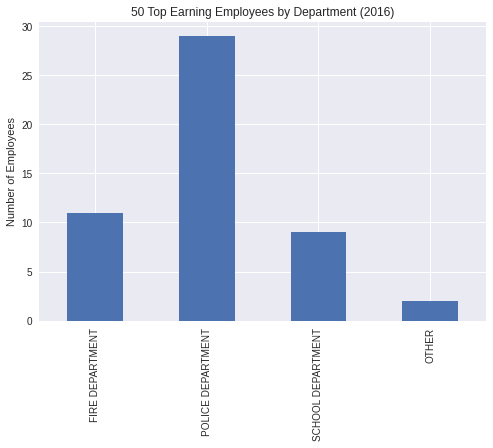

In [342]:
top_50_count.plot.bar()
plt.title('50 Top Earning Employees by Department (2016)')
plt.ylabel('Number of Employees')
plt.xlabel('')
plt.legend().remove()
plt.savefig(FP_FIG_TOP_OUT)

## Best earning police

In [92]:
cop = eer.groupby('dept').get_group('POLICE DEPARTMENT').sort_values('total',ascending=False).reset_index(drop=True)

In [93]:
cop.head()

,name,dept,title,regular,overtime,detail,other,total
0,"MCCARTHY, JAMES",POLICE DEPARTMENT,POLICE OFFICER,65511.20,25923.08,95404.0,15317.55,221908.69
1,"TEMPESTA, DAVID",POLICE DEPARTMENT,POLICE LIEUTENANT,91733.57,19559.50,54753.5,7156.42,195029.86
2,"MACDONALD, DAVID",POLICE DEPARTMENT,POLICE CHIEF,140744.31,0.00,0.0,13518.76,193479.10
3,"CLAFLIN, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,78404.48,11378.07,70456.0,9551.15,191237.89
4,"BABCOCK, JOHN",POLICE DEPARTMENT,POLICE SERGEANT,72597.34,22847.44,57957.5,6656.60,181755.27


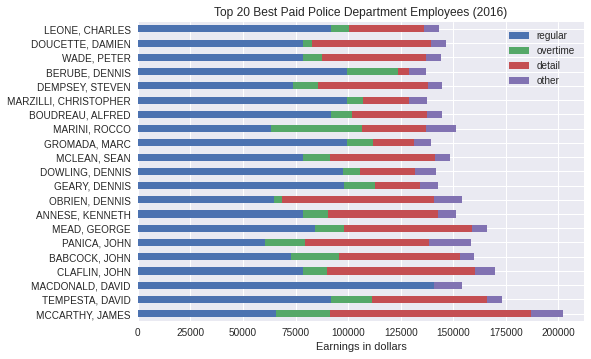

In [344]:
cop.loc[:20,:].plot.barh(x = 'name',y=['regular','overtime','detail','other'],stacked=True)
plt.xlabel('Earnings in dollars')
plt.ylabel('')
plt.title('Top 20 Best Paid Police Department Employees (2016)')
plt.savefig(FP_FIG_OVRTM_OUT)

In [67]:
cop.describe()

,regular,overtime,detail,other,total
count,259.000000,259.000000,259.000000,259.000000,259.000000
mean,47907.093166,4973.230811,14293.154826,7828.617336,82157.718069
std,28150.763261,7009.218822,19161.607003,5740.052298,53833.048786
min,0.000000,0.000000,0.000000,-1550.050000,215.430000
25%,12730.165000,0.000000,0.000000,1871.230000,27016.835000
50%,57139.040000,1882.810000,2801.000000,7451.940000,89240.610000
75%,64522.190000,8075.155000,25725.750000,12310.335000,121437.885000
max,140744.310000,43599.690000,95404.000000,32064.400000,221908.690000
